In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats
%matplotlib inline

In [2]:
times, metrics = pickle.load(open('data/run_result.pkl', 'r'))

In [3]:
times = np.array(times)
metrics = np.array(metrics)
print 'seed, method, iter'
print times.shape
print metrics.shape

seed, method, iter
(10, 5, 4)
(10, 5, 4)


In [4]:
labels = ['pb', 'stan', 'prism', 'tm-gibbs', 'tm-vem']

In [5]:
times_metrics = {labels[i]:(times[:,i,:], metrics[:,i,:]) for i in range(5)}

In [6]:
times_metrics['pb'][0].shape

(10, 4)

In [7]:
for k,v in times_metrics.iteritems():
    print k
    print np.average(v[0], axis=0)
    print np.std(v[0], axis=0)
    print np.average(v[1], axis=0)
    print np.std(v[1], axis=0)

pb
[  55.3949528    99.59045718  147.4241343   194.97167165]
[ 2.55496199  0.73312099  3.31214787  3.60574915]
[-311529.87637914 -307830.26786278 -306174.63000468 -305220.71730092]
[ 553.02771989  643.71074695  621.78005349  542.95283981]
stan
[  61.96145494  115.51616213  240.32856827  599.09722102]
[   0.54563903   39.28065515  115.86720152  144.80655547]
[-330378.98218853 -318436.97484736 -308026.44170665 -304742.23338447]
[ 1967.68730607  3882.21615005  1818.48449919   267.03913119]
prism
[ 3.36979642  4.16933935  5.04007308  5.9056684 ]
[ 0.11105355  0.0955837   0.14735313  0.11543971]
[-304229.63059772 -301718.64004055 -301456.31886513 -301298.71684641]
[ 742.2690151   327.25853622  262.12396196  253.59758681]
tm-gibbs
[ 1.22992082  1.95140474  2.6710741   3.3863431 ]
[ 0.00360608  0.00645611  0.0110305   0.00923172]
[-304370.02418806 -303292.33267326 -303227.27653716 -303245.00537465]
[ 716.0849929   119.43274716   47.73122248   49.2727003 ]
tm-vem
[  7.3280895    8.9202924   10

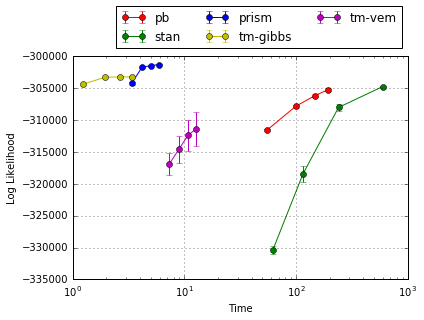

In [9]:
plt.xlabel('Time')
plt.ylabel('Log Likelihood')
plt.grid()
colors = ['r', 'g', 'b', 'y', 'm']
for c, (k,v) in zip(colors, times_metrics.iteritems()):
    x = np.average(v[0], axis=0)
    #print x.shape
    y = np.average(v[1], axis=0)
    y_err = stats.sem(v[1])
    #print y_err.shape
    #plt.semilogx(x, y, color=c, label=k, marker='o')
    #plt.fill_between(x, y-y_err, y+y_err, color=c, alpha=0.3)
    plt.errorbar(x,y, yerr = y_err, color=c, label=k, marker='o')
    plt.xscale("log")
lgd = plt.legend(ncol=3, bbox_to_anchor=(1, 1.25))
plt.savefig('data/lls.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')